In [1]:
# supress unnecessary warnings so the notebook looks clean
import warnings
warnings.filterwarnings('ignore')

# import libraries to quickly analyze data
import numpy as np
import pandas as pd
pd.set_option('precision', 4)

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab

In [2]:
# read the datasets
train  = pd.read_csv("datasets/train.csv")
test   = pd.read_csv("datasets/test.csv")

In [3]:
# let's look at the size of the train and test datasets
print("train:  nrows %d, ncols %d" % train.shape)
print("test:   nrows %d, ncols %d" % test.shape)

train:  nrows 59381, ncols 128
test:   nrows 19765, ncols 127


In [4]:
# features available in train dataset
feature_list = []
for column, _ in train.iloc[1,:].iteritems():
    feature_list.append(column)
        
print("Number of features in the training data:",len(feature_list))
print("-"*20)
print(feature_list)

Number of features in the training data: 128
--------------------
['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'M

## Data Analysis

### 1. Missing Values

First, let's find the columns with missing data. As you can see, only 1% of the rows for Medical_History_10 have values.

In [5]:
# list features with missing values
print("%20s \t Count \t Pct missing" % 'Feature')

for column_name, column in train.transpose().iterrows():
    naCount = sum(column.isnull())
    if naCount > 0:
       #print column_name, naCount, "Percent missing: %f%%" % 100.*naCount/train.shape[0]
       print("%20s \t %5d  \t %2.2f%%" % (column_name, naCount, 100.*naCount/train.shape[0]))

             Feature 	 Count 	 Pct missing
   Employment_Info_1 	    19  	 0.03%
   Employment_Info_4 	  6779  	 11.42%
   Employment_Info_6 	 10854  	 18.28%
 Insurance_History_5 	 25396  	 42.77%
       Family_Hist_2 	 28656  	 48.26%
       Family_Hist_3 	 34241  	 57.66%
       Family_Hist_4 	 19184  	 32.31%
       Family_Hist_5 	 41811  	 70.41%
   Medical_History_1 	  8889  	 14.97%
  Medical_History_10 	 58824  	 99.06%
  Medical_History_15 	 44596  	 75.10%
  Medical_History_24 	 55580  	 93.60%
  Medical_History_32 	 58274  	 98.14%


### 2. Feature Engineering

#### $\star$ Response: Class Imbalance

In [6]:
print(train.columns.equals(test.columns))

False


In [7]:
# identify target feature
print(train.columns.difference(test.columns))

Index(['Response'], dtype='object')


In [8]:
train['Response'].value_counts().sort_index().reset_index()

,index,Response
0,1,6207
1,2,6552
2,3,1013
3,4,1428
4,5,5432
5,6,11233
6,7,8027
7,8,19489


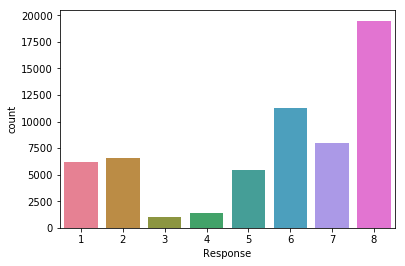

In [9]:
sns.countplot(x='Response',data=train,palette="husl", order = range(1,9))

#### $\star$ Employment Information

Plot distributions for Employment_Info_4 and Employment_Info_6. Interesting distribution for Employment_Info_6.

In [10]:
list_eh = ['Employment_Info_4', 'Employment_Info_6']
train[list_eh].head()

,Employment_Info_4,Employment_Info_6
0,0.0,NaN
1,0.0,0.0018
2,0.0,0.0300
3,0.0,0.2000
4,0.0,0.0500


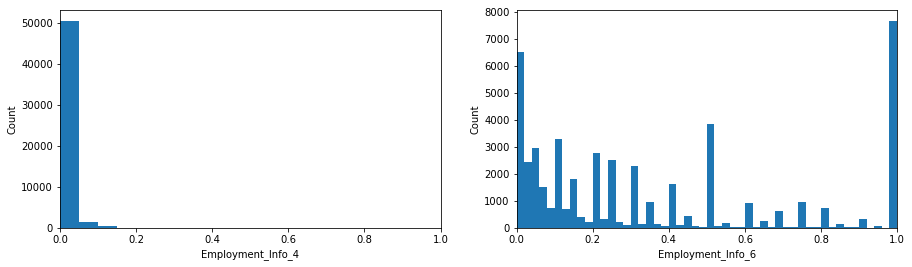

In [11]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

train["Employment_Info_4"].plot(kind='hist',bins=20,xlim=(0,1),ax=axis1)
axis1.set_xlabel("Employment_Info_4")
axis1.set_ylabel("Count")

train["Employment_Info_6"].plot(kind='hist',bins=50,xlim=(0,1),ax=axis2)
axis2.set_xlabel("Employment_Info_6")
axis2.set_ylabel("Count")

#### $\star$  Insurance History

Insurance_History_5 has a few large outliers, otherwise most of the data is less than 0.02. The data appears to be quantized.

In [12]:
# is there anything to learn in the data quantization for Insurance_History_5
x = min(train["Insurance_History_5"][train["Insurance_History_5"]>0])
print("Min value > 0: %e   1/(Min value > 0) %f" % (x,1./x))

Min value > 0: 6.670000e-09   1/(Min value > 0) 149925037.481259


In [13]:
# list all of the Insurance_History_5 values greater than 0.02  (Max is 1.0)
train["Insurance_History_5"][train["Insurance_History_5"]>0.02]

1043     0.1333
1442     0.0333
1511     0.0233
1985     0.0233
2061     0.0780
3270     0.0333
6980     0.0333
11841    0.0267
13129    0.0400
14520    0.0267
14655    0.0297
22408    0.0333
22455    0.0333
24372    0.0333
25077    0.0667
28786    0.0333
29825    0.0317
34043    0.0267
34291    0.0333
35723    1.0000
38258    0.0333
38279    0.0333
39022    0.4919
39605    0.0333
44091    0.0333
46630    0.0400
47245    0.6405
48957    0.0233
51146    0.0333
52596    0.0267
53456    0.0233
56685    0.0400
Name: Insurance_History_5, dtype: float64

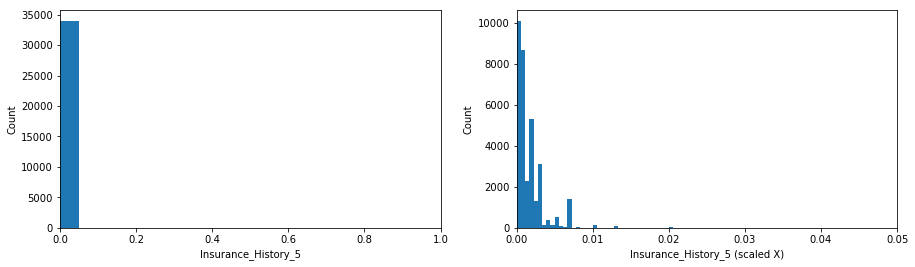

In [14]:
# plot distribution for Insurance_History_5 with two different x-axis scalings
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

train["Insurance_History_5"].plot(kind='hist',bins=20,xlim=(0,1),ax=axis1)
axis1.set_xlabel("Insurance_History_5")
axis1.set_ylabel("Count")

train["Insurance_History_5"][train["Insurance_History_5"]<0.034].plot(kind='hist',bins=60,xlim=(0,.05),ax=axis2)
axis2.set_xlabel("Insurance_History_5 (scaled X)")
axis2.set_ylabel("Count")

#### $\star$  Family History

In [15]:
list_fh = ['Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
train[list_fh].head()

,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
0,NaN,0.598,NaN,0.5268
1,0.1884,NaN,0.0845,NaN
2,0.3043,NaN,0.2254,NaN
3,0.4203,NaN,0.3521,NaN
4,0.4638,NaN,0.4085,NaN


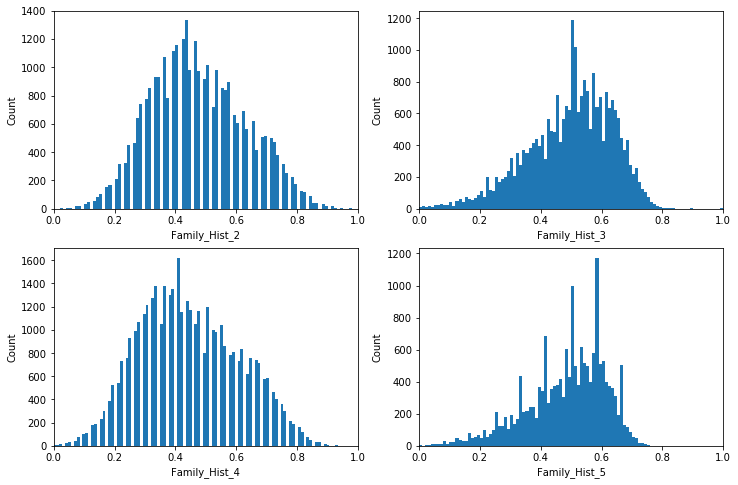

In [16]:
pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)

train["Family_Hist_2"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Family_Hist_2")
axisArr[0,0].set_ylabel("Count")

train["Family_Hist_3"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Family_Hist_3")
axisArr[0,1].set_ylabel("Count")

train["Family_Hist_4"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Family_Hist_4")
axisArr[1,0].set_ylabel("Count")

train["Family_Hist_5"].plot(kind='hist',bins=100,xlim=(0,1),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Family_Hist_5")
axisArr[1,1].set_ylabel("Count")

Multiplying the data by 71 turns Family_Hist_4 into integer data. So the original data may have had a range of 0-71 (assuming the data hasn't been shifted)

In [17]:
pd.DataFrame(train["Family_Hist_4"][1:10]*71)

,Family_Hist_4
1,6.0
2,16.0
3,25.0
4,29.0
5,36.0
6,39.0
7,NaN
8,48.0
9,NaN


#### $\star$  Medical History

Worth noting: Medical History 1 features with missing values aren't normalized. The max value is 240.

In [18]:
pd.DataFrame(train["Medical_History_1"]).head()

,Medical_History_1
0,4.0
1,5.0
2,10.0
3,0.0
4,NaN


In [19]:
max(train["Medical_History_1"])

240.0

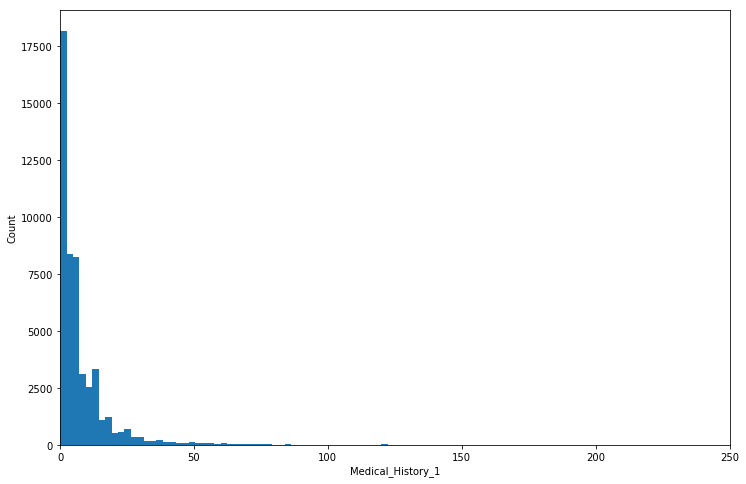

In [20]:
train["Medical_History_1"].plot(kind='hist',xlim=(0,250),bins=100)
plt.xlabel("Medical_History_1")
plt.ylabel("Count")

In [21]:
list_mh1 = ['Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
train[list_mh1].head()

,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,NaN,240.0,NaN,NaN
1,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


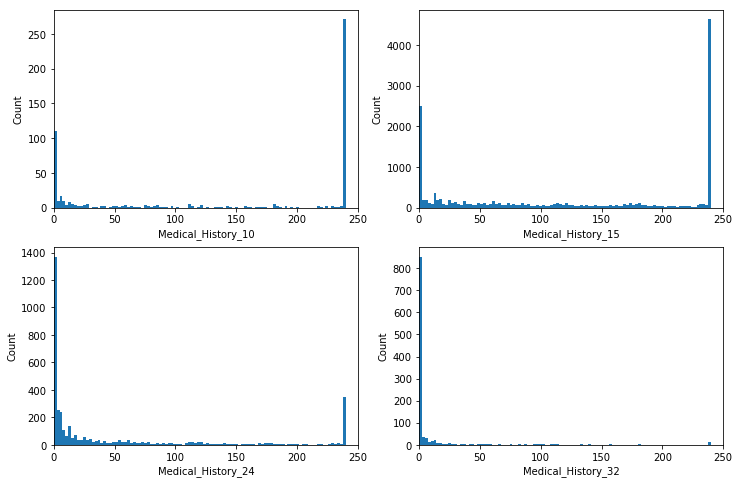

In [22]:
# Plot distributions for Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32
pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)

train["Medical_History_10"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Medical_History_10")
axisArr[0,0].set_ylabel("Count")

train["Medical_History_15"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Medical_History_15")
axisArr[0,1].set_ylabel("Count")

train["Medical_History_24"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Medical_History_24")
axisArr[1,0].set_ylabel("Count")

train["Medical_History_32"].plot(kind='hist',bins=100,xlim=(0,250),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Medical_History_32")
axisArr[1,1].set_ylabel("Count")

#### $\star$  Other Medical History 

The features below don't have missing values, but do have interesting distributions. They appear to be binary, with somewhat arbitrary integer offsets and scalings. This makes them somewhat different that the medical histories plotted above. Those are binomial and appear to have continous values.

In [23]:
list_mh2 = ['Medical_History_33', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40']
train[list_mh2].head()

,Medical_History_33,Medical_History_38,Medical_History_39,Medical_History_40
0,1,1,3,3
1,3,1,3,3
2,3,1,3,3
3,3,1,3,3
4,3,1,3,3


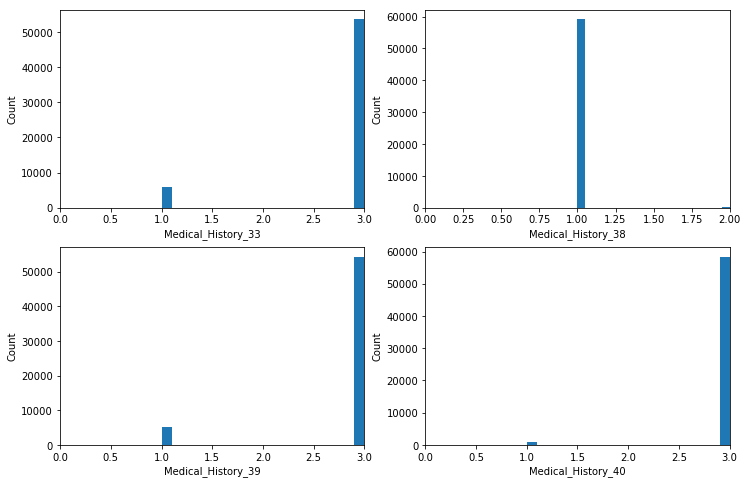

In [24]:
# Plot the distributions for Medical_History_33, Medical_History_38, Medical_History_39 and Medical_History_40
pylab.rcParams['figure.figsize'] = (12.0, 8.0)
fig, axisArr = plt.subplots(2,2)

train["Medical_History_33"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[0,0])
axisArr[0,0].set_xlabel("Medical_History_33")
axisArr[0,0].set_ylabel("Count")

train["Medical_History_38"].plot(kind='hist',bins=20,xlim=(0,2),ax=axisArr[0,1])
axisArr[0,1].set_xlabel("Medical_History_38")
axisArr[0,1].set_ylabel("Count")

train["Medical_History_39"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[1,0])
axisArr[1,0].set_xlabel("Medical_History_39")
axisArr[1,0].set_ylabel("Count")

train["Medical_History_40"].plot(kind='hist',bins=20,xlim=(0,3),ax=axisArr[1,1])
axisArr[1,1].set_xlabel("Medical_History_40")
axisArr[1,1].set_ylabel("Count")

#### $\star$  Product Information

Product_Info_2 is categorical with 19 categories.

In [25]:
train['Product_Info_2'].value_counts().sort_index().reset_index()

,index,Product_Info_2
0,A1,2363
1,A2,1974
2,A3,977
3,A4,210
4,A5,775
5,A6,2098
6,A7,1383
7,A8,6835
8,B1,54
9,B2,1122


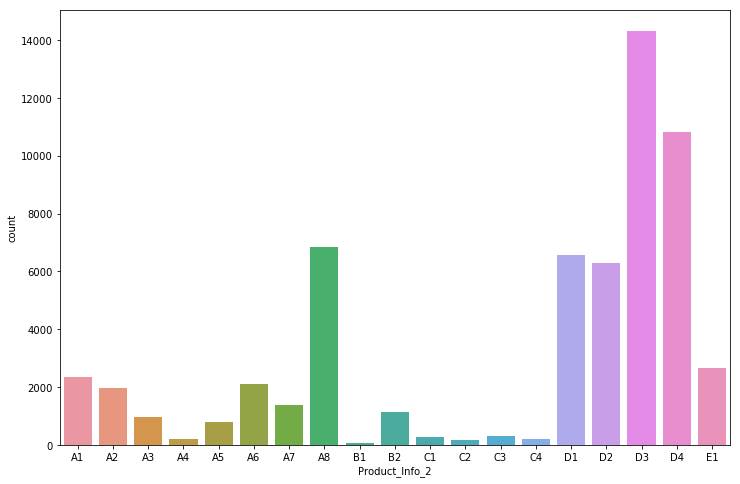

In [26]:
sns.countplot(x='Product_Info_2', data=train, 
              order=['A1','A2','A3','A4','A5','A6','A7','A8',
                     'B1','B2',
                     'C1','C2','C3','C4',
                     'D1','D2','D3','D4',
                     'E1'])

The following plots are of the same data broken out for each Response.

Be careful when looking at these plots. The response data doesn't have a uniform distribution, and these plots haven't been normalized for either the response distribution, or the Product_Info_2 distribution.


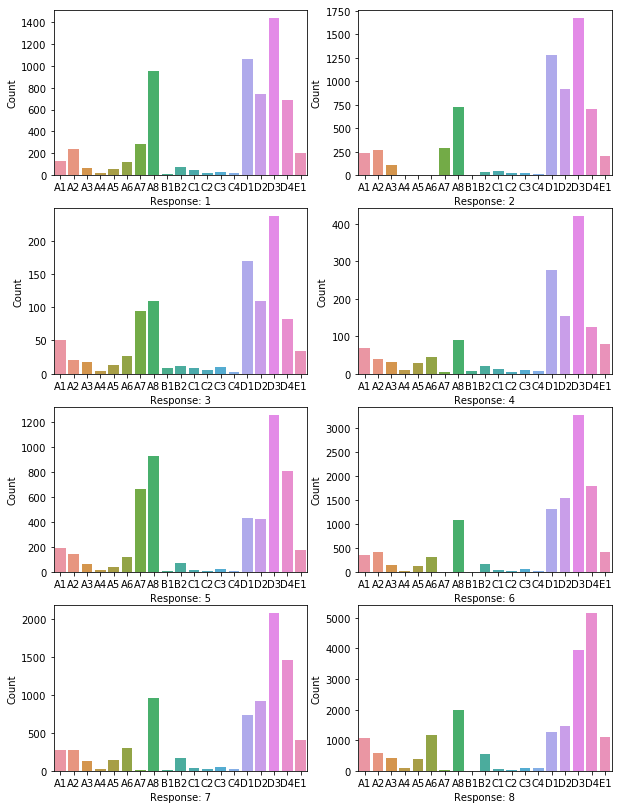

In [27]:
pylab.rcParams['figure.figsize'] = (10.0, 14.0)
f, axisarr = plt.subplots(4, 2)

for r in range(1,9):
    axs = axisarr[int((r-1)/2),(r-1)%2]
    sns.countplot(x='Product_Info_2', data=train[train["Response"]==r], 
              order=['A1','A2','A3','A4','A5','A6','A7','A8',
                     'B1','B2',
                     'C1','C2','C3','C4',
                     'D1','D2','D3','D4',
                     'E1'],ax=axs)
    axs.set_ylabel('Count')
    axs.set_xlabel('Response: '+str(r))

#### $\star$  Age vs. Response

Looking at responses as a function of age. It's not surprising that responses differ as a function of age.

In [28]:
train[['Ins_Age','Response']].head()

,Ins_Age,Response
0,0.6418,8
1,0.0597,4
2,0.0299,8
3,0.1642,8
4,0.4179,8


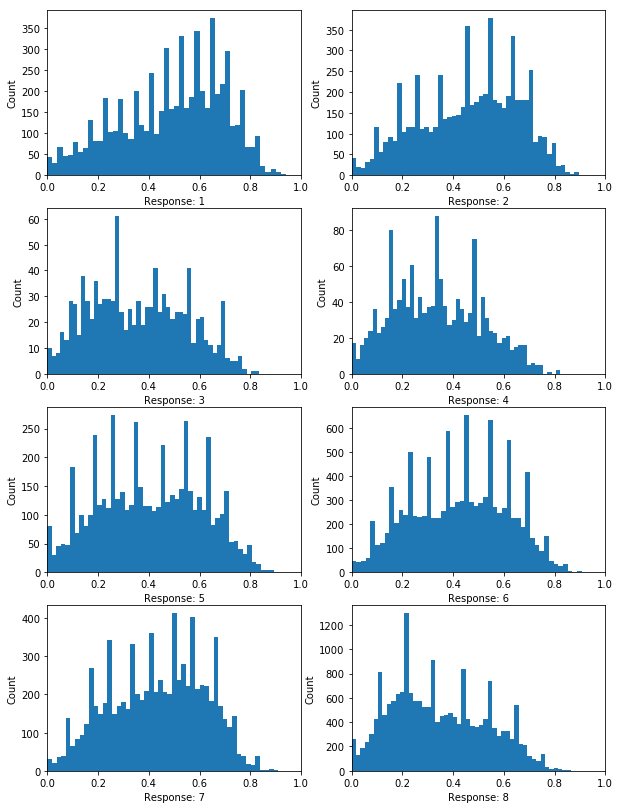

In [29]:
pylab.rcParams['figure.figsize'] = (10.0, 14.0)
f, axisarr = plt.subplots(4, 2)

for r in range(1,9):
    axs = axisarr[int((r-1)/2),(r-1)%2]
    train["Ins_Age"][train["Response"]==r].plot(kind='hist',bins=50,xlim=(0,1),ax=axs)
    axs.set_ylabel('Count')
    axs.set_xlabel('Response: '+str(r))

## Model Building

In [30]:
import time
import xgboost as xgb
from sklearn import preprocessing

There are some columns with non-numerical values(i.e. dtype='object'). So, We will create a  corresponding unique numerical value for each non-numerical value in a column of training and testing set.

In [31]:
for feature in train.columns:
    if train[feature].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(train[feature].values) + list(test[feature].values)))
        train[feature] = lbl.transform(list(train[feature].values))
        test[feature] = lbl.transform(list(test[feature].values))

There are many NaN values we must fill. We use mean value for float data and median for others.

In [32]:
for feature in train.columns:
    if feature == "Response": 
        continue
    if train[feature].dtype == 'float64':
        train[feature].fillna(train[feature].mean(), inplace=True)
        test[feature].fillna(test[feature].mean(), inplace=True)
    else:
        train[feature].fillna(train[feature].median(), inplace=True)
        test[feature].fillna(test[feature].median(), inplace=True)

### 1.  XGBoost model

In [33]:
# define training and testing sets
x_train = train.drop(["Response", "Id"],axis=1)
y_train = train["Response"]
x_test  = test.drop("Id",axis=1).copy()

In [34]:
# modify response values so that range of values is from 0-7 instead of 1-8
y_train = y_train - 1
y_train.value_counts().sort_index().reset_index()

,index,Response
0,0,6207
1,1,6552
2,2,1013
3,3,1428
4,4,5432
5,5,11233
6,6,8027
7,7,19489


In [35]:
# predict the response
start_time = time.time()

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

# train the model
params = {"objective": "multi:softmax", "num_class": 8}
model_pred = xgb.train(params, dtrain, 20)

print("predict time:{}s".format(round((time.time()-start_time), 3) ))

predict time:49.973s


In [36]:
# make predictions 
y_pred = model_pred.predict(dtest)

# change values back to range of values is from 1-8 instead of 0-7
y_pred = y_pred + 1
y_pred = y_pred.astype(int)

# display the result
prudential = pd.DataFrame({
        "Id": test["Id"],
        "Response": y_pred})
prudential[:5]  

,Id,Response
0,1,7
1,3,6
2,4,6
3,9,8
4,12,6


### 2.  Features importances

In [37]:
start_time = time.time()

model_feat = xgb.XGBClassifier(max_depth=4,learning_rate=0.05, n_estimators=300,
                               subsample=0.95, objective='multi:softmax')
model_feat.fit(x_train,y_train)

print("predict time:{}s".format(round((time.time()-start_time), 3) ))

predict time:1069.163s


In [38]:
# display the 5th first features by importances
importances =pd.DataFrame({'features' :x_train.columns, 'importances':model_feat.feature_importances_})
importances.sort_values(by = 'importances', ascending = False).head(10)

,features,importances
10,BMI,0.1159
51,Medical_History_15,0.0782
7,Ins_Age,0.0640
3,Product_Info_4,0.0552
9,Wt,0.0421
11,Employment_Info_1,0.0354
1,Product_Info_2,0.0345
34,Family_Hist_3,0.0315
37,Medical_History_1,0.0272
35,Family_Hist_4,0.0271


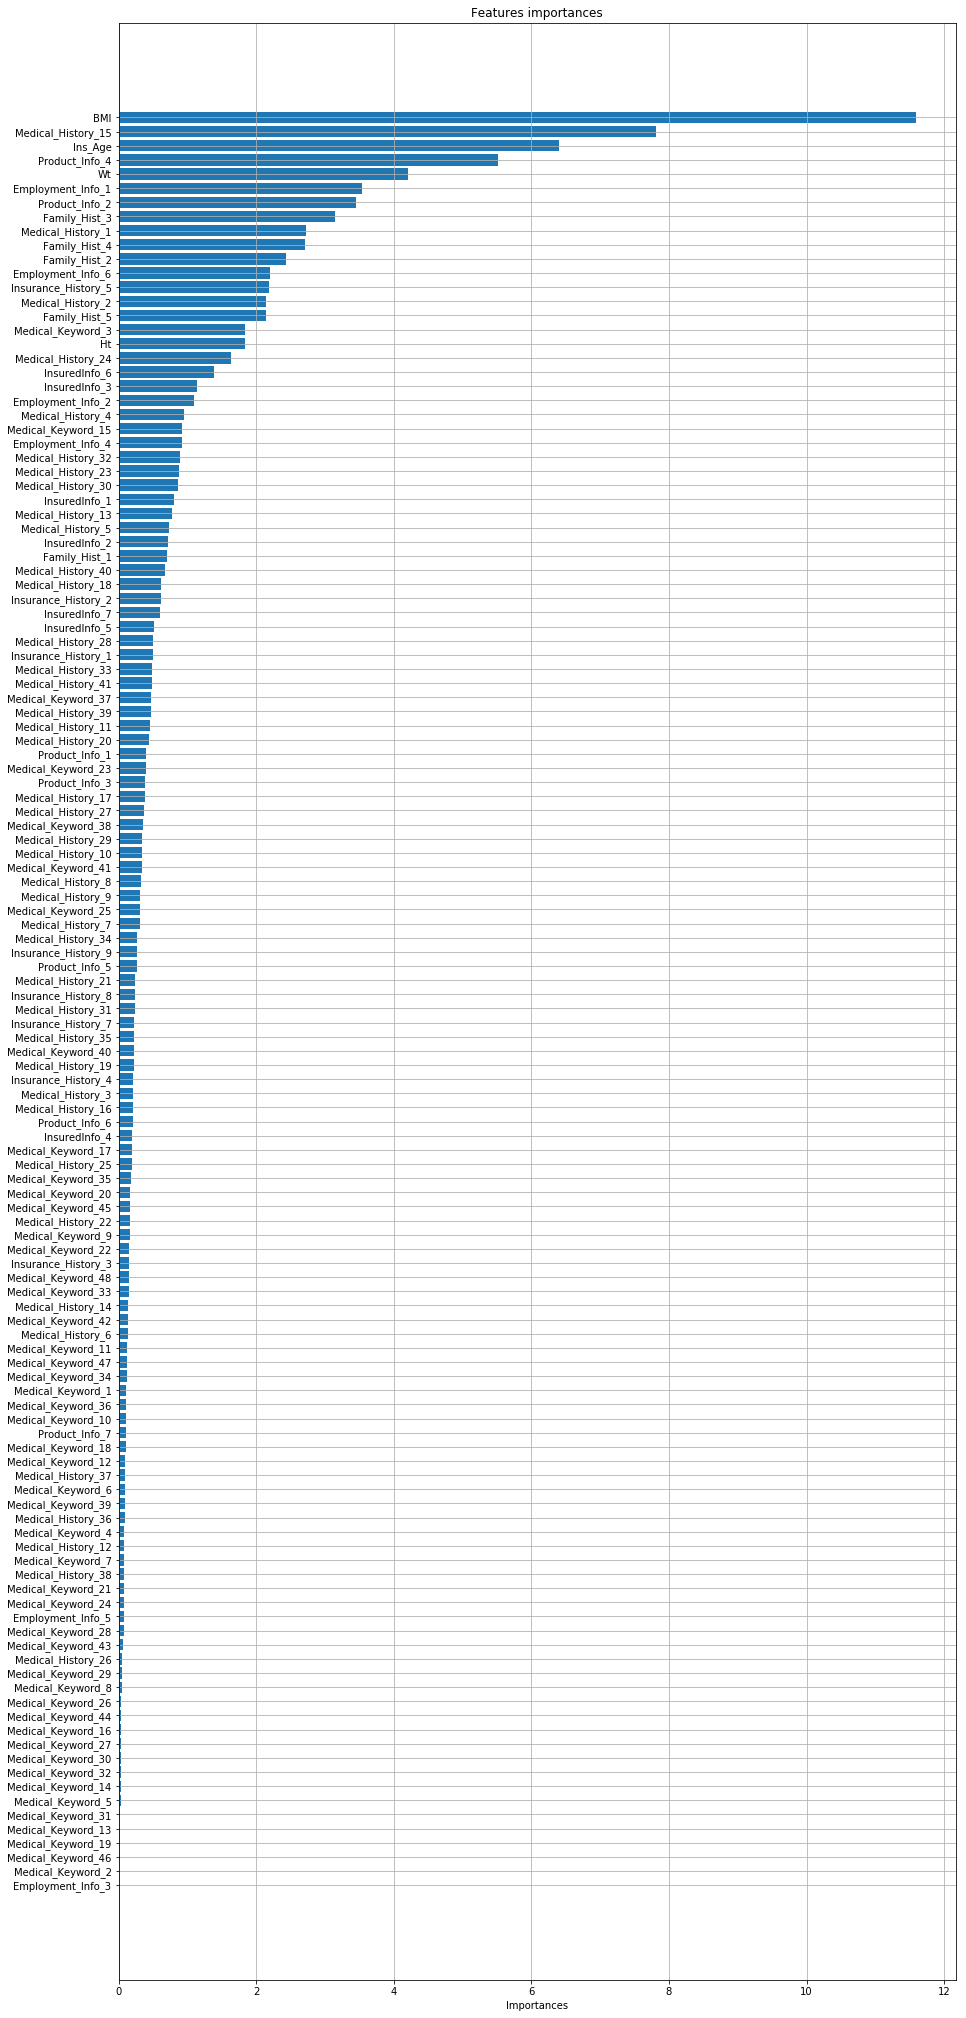

In [39]:
# plot importances
importances.sort_values(by = 'importances', ascending = True, inplace = True)
val = importances.importances*100    # the bar lengths
pos = np.arange(importances.shape[0])+.5 

plt.figure(figsize = (15,36))
plt.barh(pos,val, align='center')
plt.yticks(pos, importances.features.values)
plt.xlabel('Importances')
plt.title('Features importances')
plt.grid(True)

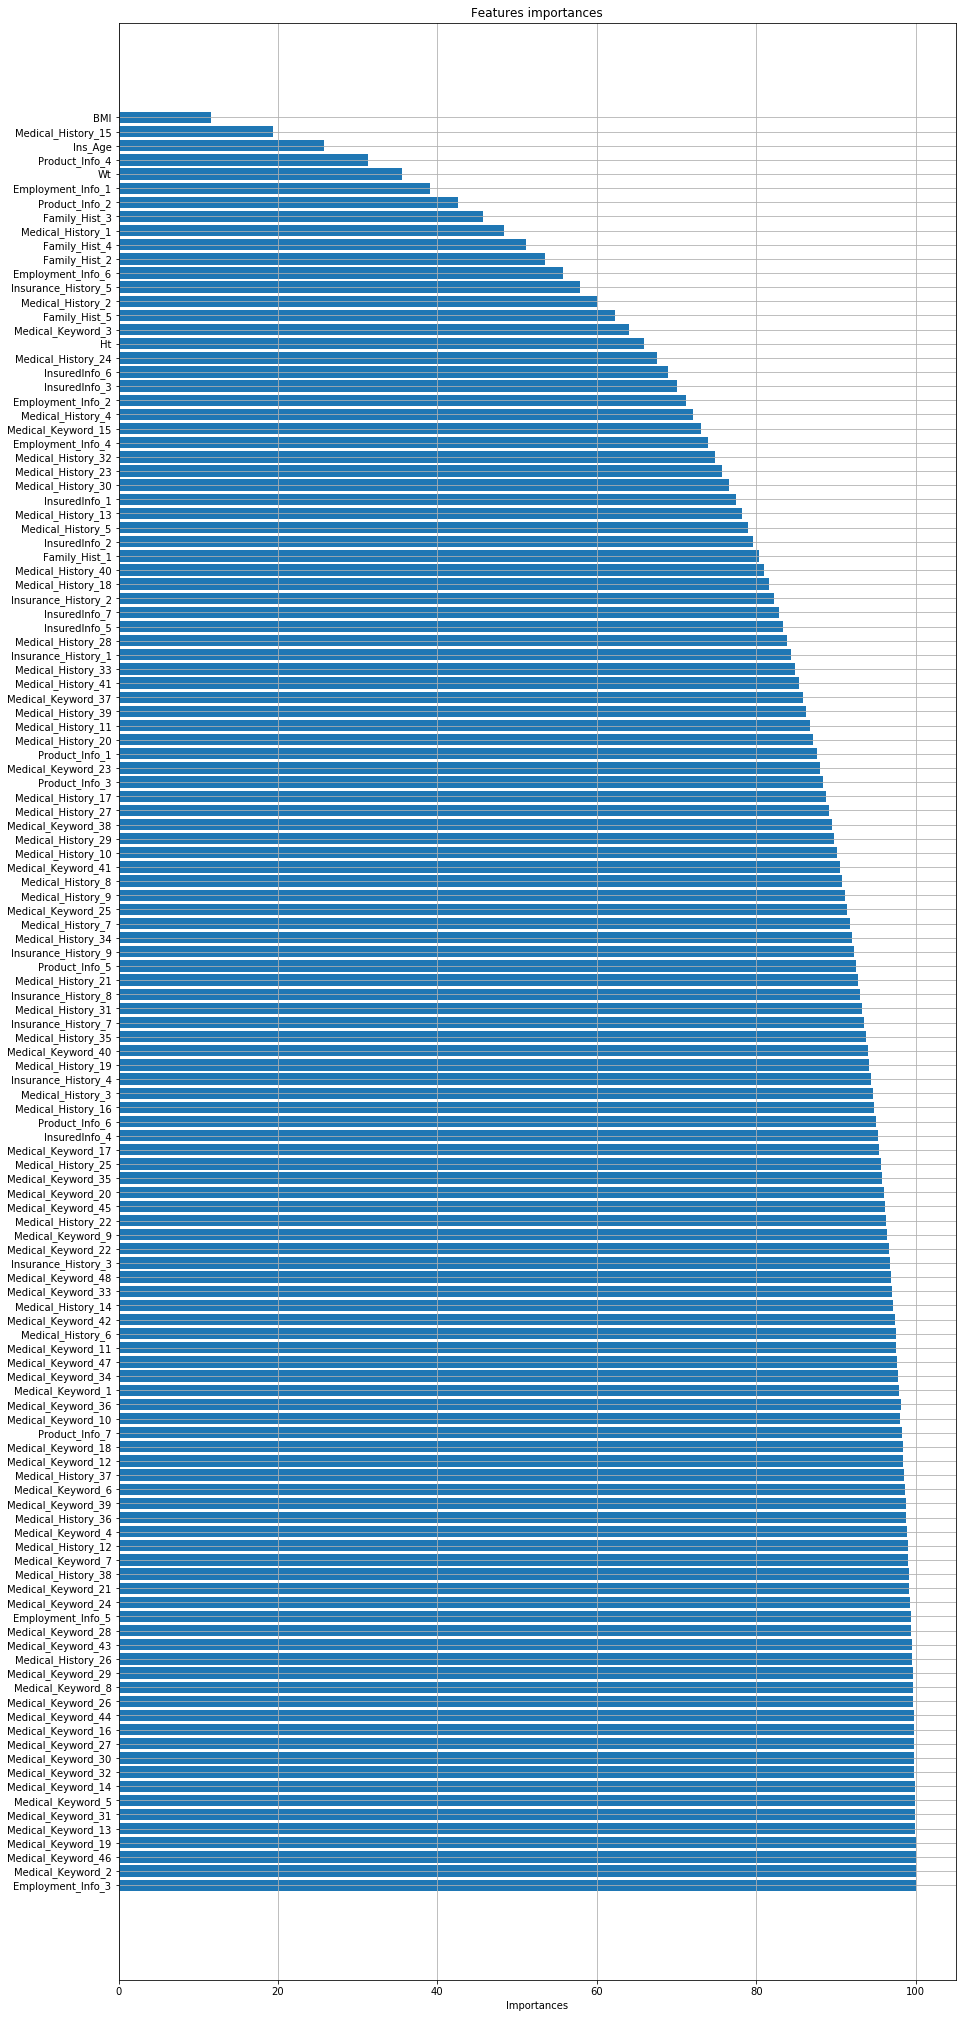

In [40]:
# plot cumsum of importances
importances.sort_values(by = 'importances', ascending = False, inplace = True)
importances['cumul'] = np.cumsum(importances.importances, axis = 0)

importances.sort_values(by = 'importances', ascending = True, inplace = True)
val = importances.cumul*100    # the bar lengths
pos = np.arange(importances.shape[0])+.5 

plt.figure(figsize = (15,36))
plt.barh(pos,val, align='center')
plt.yticks(pos, importances.features.values)
plt.xlabel('Importances')
plt.title('Features importances')
plt.grid(True)

In [41]:
for i in np.arange(50,100,5):
    print('Number of variables to have {0} % d\' \"importance\" variables: {1} sure {2}'.format \
          (i,importances.features[importances.cumul<i/100].shape[0], importances.features.shape[0]))

Number of variables to have 50 % d' "importance" variables: 9 sure 126
Number of variables to have 55 % d' "importance" variables: 11 sure 126
Number of variables to have 60 % d' "importance" variables: 13 sure 126
Number of variables to have 65 % d' "importance" variables: 16 sure 126
Number of variables to have 70 % d' "importance" variables: 19 sure 126
Number of variables to have 75 % d' "importance" variables: 25 sure 126
Number of variables to have 80 % d' "importance" variables: 31 sure 126
Number of variables to have 85 % d' "importance" variables: 40 sure 126
Number of variables to have 90 % d' "importance" variables: 52 sure 126
Number of variables to have 95 % d' "importance" variables: 71 sure 126
